In [1]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

In [2]:
filepath = "emails.csv"
# Read the data into a pandas dataframe called emails
emails = pd.read_csv(filepath)
headers = [header for header in emails.columns]
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(display(emails.head()))

Successfully loaded 517401 rows and 2 columns!


,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700..."
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ..."
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700..."
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700..."
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700..."


None


In [3]:
print(emails.loc[0]["message"])


Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [4]:
import email

In [5]:
def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary


def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header) 
    print("Successfully retrieved header information!")
    return headers


header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To"]    
headers = get_headers(emails, header_names)

Successfully retrieved header information!


In [6]:
x_from = pd.DataFrame(headers["X-From"], columns = ["X-From"])
print(x_from.iloc[:1000]["X-From"].unique()[:10])
if "X-From" not in emails.columns:
    emails = pd.concat([emails, x_from], axis = 1, join = 'inner')

['Phillip K Allen' 'Ina Rangel'
 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>'
 '"Bloomberg.com" <messenger@ecm.bloomberg.com>'
 '"Arthur O\'Donnell" <aod@newsdata.com>' 'critical.notice@Enron.com'
 'market-reply@LISTSERV.DOWJONES.COM' 'Rebecca W Cantrell'
 '"Earnings.com" <webmaster@earnings.com>' 'Paul Kaufman']


In [7]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]: 
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)        
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df
emails = add_name(df = emails, column = "file", labels = ["employee"])

Successfully added new column!


In [8]:
def add_headers(df, header_list):
    for label in header_list:
        df_new = pd.DataFrame(headers[label], columns = [label])
        if label not in df.columns:
            df = pd.concat([df, df_new], axis = 1)
    return df
remaining_headers = ["Date", "Subject", "X-To", "X-From", "X-Folder"]
emails = add_headers(df = emails, header_list = remaining_headers)
print("Here is the emails dataframe after appending all the relevant headers")
print(display(emails.iloc[:1]))

Here is the emails dataframe after appending all the relevant headers


,file,message,X-From,employee,Date,Subject,X-To,X-Folder
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",Phillip K Allen,allen-p,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail"


None


In [9]:
print(emails["X-Folder"].sample(7))


267437                    \John_Lavorato_Oct2001\Notes Folders\Sent
8865             \Robert_Badeer_Aug2000\Notes Folders\All documents
502804          \Lawrence_Whalley_Dec2000\Notes Folders\Notes inbox
197338                     \Tanya_Jones_June2001\Notes Folders\Sent
336697     \steven merriss 6-28-02\Notes Folders\Discussion threads
18822     \Edward_Baughman_Nov2001\Notes Folders\Discussion threads
201090         \Vincent_Kaminski_Jun2001_8\Notes Folders\'sent mail
Name: X-Folder, dtype: object


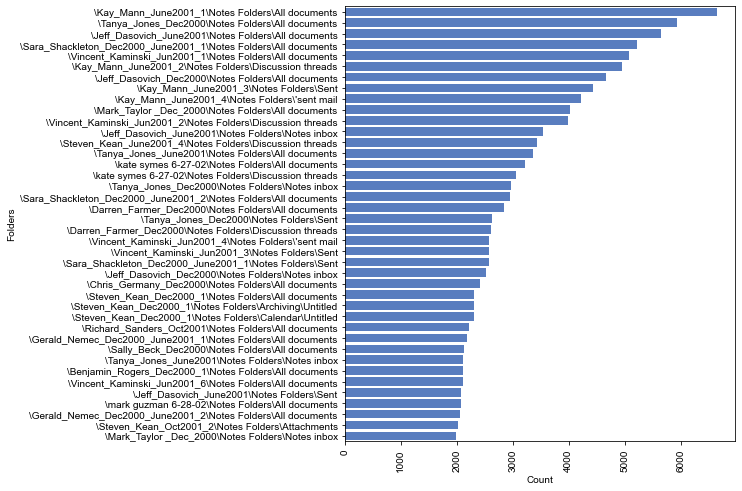

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataframe containing counts of every word in the emails dataframe
email_count = emails["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)

In [11]:
'''
**Figure 1**: Bar plot showing 40 folders that contain the most e-mails 

A look into `williams-w3` folder counts and you will see that the `schedule crawler` 
and `bill williams iii` contained lots of e-mails and were the most used by this employee.  
These two folders were also in the top 5 largest folders used by any employee at Enron.
'''

'\n**Figure 1**: Bar plot showing 40 folders that contain the most e-mails \n\nA look into `williams-w3` folder counts and you will see that the `schedule crawler` \nand `bill williams iii` contained lots of e-mails and were the most used by this employee.  \nThese two folders were also in the top 5 largest folders used by any employee at Enron.\n'

In [12]:
williams = emails[emails["employee"] == "williams-w3"]
williams["X-Folder"].value_counts()[:8]


\ExMerge - Williams III, Bill\Schedule Crawler             1398
\Williams III, Bill (Non-Privileged)\Bill Williams III     1022
\ExMerge - Williams III, Bill\Sent Items                    519
\ExMerge - Williams III, Bill\Inbox                         137
\ExMerge - Williams III, Bill\HR                             86
\ExMerge - Williams III, Bill\SymesEES                       81
\ExMerge - Williams III, Bill\Human Resources                45
\ExMerge - Williams III, Bill\Operations Committee/ISAS      19
Name: X-Folder, dtype: int64

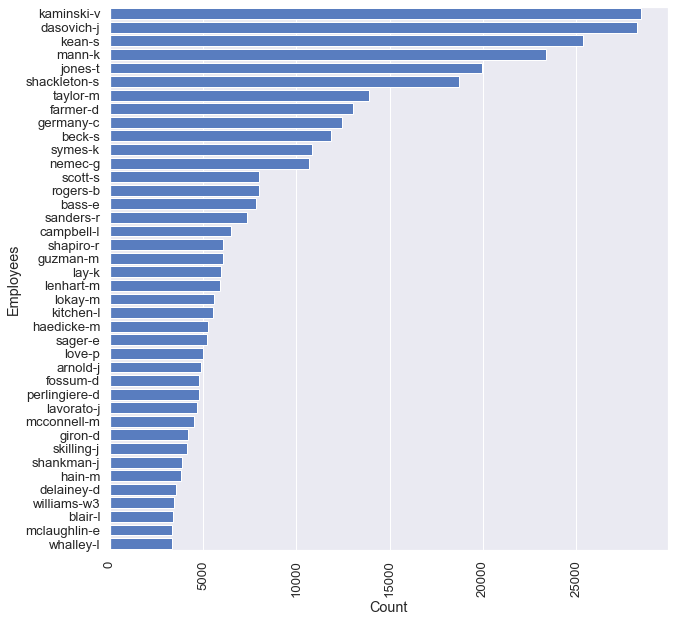

In [13]:
mail_count = emails["employee"].value_counts()
indices = mail_count.index
count = pd.DataFrame(mail_count)
count.rename(columns = {"employee": "Count"}, inplace = True)
count["Employees"] = indices
barplot(df = count[:40], X = "Count", Y = "Employees", figsize = (10, 10), color = 'b', orient = 'h', ylabel = "Employees", xlabel = "Count", font_scale = .8, rotation = 90)

In [14]:
# Convert date column to datetime 
emails["Date"] = pd.to_datetime(emails["Date"])
print(emails.iloc[:1]["Date"])

0    2001-05-14 16:39:00-07:00
Name: Date, dtype: object


In [15]:
'''
### Remove Non-topical Folders

The `X-Folder` column contains several folders and subfolders that are not needed.  These include non-topical folders, which refer to folders that hold e-mails regardless of content.  These are removed because it is pretty hard to accurately train a classifier using them. Here's a few non-topical folders:
* all_documents
* discussion_threads
* sent
* deleted_items
* inbox
* sent_items
* notes_inbox
* _sent_mail
* calendar 
'''

"\n### Remove Non-topical Folders\n\nThe `X-Folder` column contains several folders and subfolders that are not needed.  These include non-topical folders, which refer to folders that hold e-mails regardless of content.  These are removed because it is pretty hard to accurately train a classifier using them. Here's a few non-topical folders:\n* all_documents\n* discussion_threads\n* sent\n* deleted_items\n* inbox\n* sent_items\n* notes_inbox\n* _sent_mail\n* calendar \n"

In [16]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if item is None or item is '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders      
emails["X-Folder"] = preprocess_folder(emails["X-Folder"])

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-16-ee32cc14c640>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item is None or item is '':


Folder cleaned!


In [17]:
# Folders we can filter out
unwanted_folders = ["all documents", "deleted items", "discussion threads", "sent", "deleted Items", "inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
emails = emails.loc[~emails['X-Folder'].isin(unwanted_folders)]
print(emails.iloc[:15]["X-Folder"].value_counts())

straw                   8
2000 conference         3
contacts                2
active international    1
avaya                   1
Name: X-Folder, dtype: int64


In [18]:
emails.isnull().sum()


file         0
message      0
X-From      29
employee     0
Date         0
Subject      0
X-To        29
X-Folder    29
dtype: int64

In [19]:
emails.dropna(inplace = True)
#print("Rows with missing values have been removed")
emails.isnull().sum()

file        0
message     0
X-From      0
employee    0
Date        0
Subject     0
X-To        0
X-Folder    0
dtype: int64

In [20]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        tokens = row.split(" ")
    return tokens

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-20-436390dc43b2>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if row is None or row is '':


In [21]:
import re

def remove_reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', " ", token)
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

In [22]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def assemble_bag(data):
    data = data.apply(tokenize)
    #data = data.apply(stop_word_removal)
    data = data.apply(remove_reg_expressions)
    
    unique_tokens = []
    single_tokens = []

    for item in data:
        for token in item:
            if token in single_tokens:
                if token not in unique_tokens:
                    unique_tokens.append(token)
            else:
                single_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = unique_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in unique_tokens:
                df.iloc[i][token] += 1    
    return df

In [24]:
employee = emails[emails["employee"] == "kaminski-v"]


In [25]:
def remove_folders(emails, n):
    # Returns the folders containing more than 'n' number of e-mails
    email_count = dict(emails["X-Folder"].value_counts())
    small_folders = [key for key, val in email_count.items() if val <= n]
    emails = emails.loc[~emails['X-Folder'].isin(small_folders)]
    return emails

In [26]:
n = 200
employee = remove_folders(employee, n)

In [27]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    class_le = LabelEncoder()
    # apply label encoder on the `Folder` column
    y = class_le.fit_transform(df['X-Folder'])
    df.loc[:,'y'] = y
    return df

In [28]:
label_encoder(employee)    
print("Randomly selected labels representing our folders")
unique_folders = employee["y"].unique()
print (unique_folders)

Randomly selected labels representing our folders
[1 2 4 0 3 5 6]


In [29]:
def sort(df):   
    df = df.sort_values(by = "Date", axis = 0)
    return df

In [30]:
employee = sort(employee)
print(display(employee.loc[:,("Date", "y", "X-Folder")][:10]))

,Date,y,X-Folder
210435,1999-12-10 06:43:00-08:00,2,management
209880,1999-12-10 09:17:00-08:00,1,ene_ect
221267,1999-12-10 10:46:00-08:00,5,resumes
210434,1999-12-12 07:22:00-08:00,2,management
210433,1999-12-13 02:08:00-08:00,2,management
210431,1999-12-13 23:51:00-08:00,2,management
210685,1999-12-14 00:17:00-08:00,2,management
210684,1999-12-14 00:22:00-08:00,2,management
211067,1999-12-14 02:14:00-08:00,4,projects
210683,1999-12-14 02:46:00-08:00,2,management


None


In [31]:
employee.head()

,file,message,X-From,employee,Date,Subject,X-To,X-Folder,y
210435,kaminski-v/c/mangmt/group/management/752.,"Message-ID: <5555308.1075857024860.JavaMail.evans@thyme>\nDate: Fri, 10 Dec 1999 06:43:00 -0800 ...",Shirley Crenshaw,kaminski-v,1999-12-10 06:43:00-08:00,Research Group Move to the 19th Floor,"Stinson Gibner, Joseph Hrgovcic, Paulo Issler, Vince J Kaminski, Pinnamaneni Krishnarao, Martin ...",management,2
209880,kaminski-v/c/mangmt/ene_ect/442.,"Message-ID: <17943093.1075857017071.JavaMail.evans@thyme>\nDate: Fri, 10 Dec 1999 09:17:00 -0800...",Brad McSherry,kaminski-v,1999-12-10 09:17:00-08:00,Re: Rankings,Vince J Kaminski,ene_ect,1
221267,kaminski-v/resumes/804.,"Message-ID: <3700141.1075857069674.JavaMail.evans@thyme>\nDate: Fri, 10 Dec 1999 10:46:00 -0800 ...",Robert Lee <rrlee@bizserve.com>,kaminski-v,1999-12-10 10:46:00-08:00,Re: Visit to Enron,Vince J Kaminski,resumes,5
210434,kaminski-v/c/mangmt/group/management/751.,"Message-ID: <22382596.1075857024837.JavaMail.evans@thyme>\nDate: Sun, 12 Dec 1999 07:22:00 -0800...",Kevin G Moore,kaminski-v,1999-12-12 07:22:00-08:00,Christmas Baskets,"Vince J Kaminski, Shirley Crenshaw, Mike A Roberts",management,2
210433,kaminski-v/c/mangmt/group/management/750.,"Message-ID: <27917772.1075857024814.JavaMail.evans@thyme>\nDate: Mon, 13 Dec 1999 02:08:00 -0800...",Shirley Crenshaw,kaminski-v,1999-12-13 02:08:00-08:00,Christmas - Near,"Vince J Kaminski, Stinson Gibner, Pinnamaneni Krishnarao, Vasant Shanbhogue, Mike A Roberts, Jos...",management,2


In [32]:
def prepare_features(df):
    from_bag = assemble_bag(df["X-From"])
    to_bag = assemble_bag(df["X-To"])
    message_bag = assemble_bag(df["message"])
    subject_bag = assemble_bag(df["Subject"])
    frames = [from_bag, subject_bag, to_bag, message_bag]
    X = pd.concat(frames, axis = 1, join = 'inner')
    X.drop(labels = [" ", ""], inplace = True, axis = 1)
    return X

In [33]:
X = prepare_features(employee)

In [46]:
X.head()

,shirley,crenshaw,kevin,g,moore,office,of,the,chairman,enron,...,worksheets,you please,pm to kaminski,prepare,work it,j kaminski enron com subject,follow up cc,o enron ou na cn recipients cn vkamins x cc,ines,pst vince i
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.linear_model import LogisticRegression

def split_data(X, employee):
    # split data into training and testing sets
    training_size = int(len(employee) * 0.8)
    X_train = X[:training_size]
    X_test = X[training_size:]
    y_test = employee[training_size:]["y"]
    y_train = employee[:training_size]["y"]
    return X_train, X_test, y_test, training_size

In [36]:
X_train, X_test, y_test, training_size = split_data(X, employee)

In [48]:
X_test.head()

,shirley,crenshaw,kevin,g,moore,office,of,the,chairman,enron,...,worksheets,you please,pm to kaminski,prepare,work it,j kaminski enron com subject,follow up cc,o enron ou na cn recipients cn vkamins x cc,ines,pst vince i
2295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
def fit(df, training_size, X_train):
    models = {}
    filtered_folders = []
    unique_folders = df["y"].unique()
    for folder in unique_folders:
        model = LogisticRegression()
        y_train = df[:training_size]["y"] == folder
        try:
            model.fit(X_train, y_train)
            models[folder] = model
            filtered_folders.append(folder)
        except:
            pass
    return models, filtered_folders

In [38]:
models, filtered_folders = fit(employee, training_size, X_train)


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [39]:
def predict(X_test, models, filtered_folders):
    testing_probs = pd.DataFrame(columns = filtered_folders)
    for folder in filtered_folders:
        # Computing the probability here......
        testing_probs[folder] = models[folder].predict_proba(X_test)[:,1]
    y_test_pred = testing_probs.idxmax(axis = 1)
    return y_test_pred

In [40]:
y_test_pred = predict(X_test, models, filtered_folders)


In [49]:
y_test_pred.head()

0    4
1    4
2    2
3    1
4    5
dtype: int64

In [41]:
from sklearn.metrics import accuracy_score

def acc_score(y_test, y_test_pred):
    score = accuracy_score(y_test, y_test_pred)
    return score

In [42]:
acc_score(y_test, y_test_pred)


0.9059233449477352

In [43]:
'''
### Classify several employees' e-mails

Our score on this employee is dismal. 
One thing to note is that the number of folders used by each employee could affect the model's performance. 
There may not be enough e-mails in a number of these folders to be considered statistically significant.  
For this, we will need to reduce the number of folders to include folders that contained more e-mails.
'''

"\n### Classify several employees' e-mails\n\nOur score on this employee is dismal. \nOne thing to note is that the number of folders used by each employee could affect the model's performance. \nThere may not be enough e-mails in a number of these folders to be considered statistically significant.  \nFor this, we will need to reduce the number of folders to include folders that contained more e-mails.\n"

In [44]:
'''
employee_list = emails["employee"].unique()
folder_size = [50, 100, 150, 200, 250]

def classify_emails(data, folder_size, employee_list):
    results = pd.DataFrame(columns = folder_size)
    results["employee"] = employee_list
    for i, name in enumerate(employee_list):
        for num in folder_size:
            # get data for employee
            employee = data[data["employee"] == name]
            employee = remove_folders(employee, num)
            employee = label_encoder(employee)
            if len(employee["y"].unique()) < 2: 
                break
            employee = sort(employee)
            X = prepare_features(employee)
            X_train, X_test, y_test, training_size = split_data(X, employee)
            models, filtered_folders = fit(employee, training_size, X_train)
            y_test_pred = predict(X_test, models, filtered_folders)
            score = acc_score(y_test, y_test_pred)
            # Add score to dataframe
            results.loc[i][num] = score
    return results

results = classify_emails(data = emails, folder_size = folder_size, employee_list = employee_list)
print(display(results))
'''

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

KeyboardInterrupt: 

In [45]:
print("done")

done
